# Load and analyze the dair-ai/emotion dataset

In [ ]:
# Install required packages
!pip install datasets matplotlib nltk numpy pandas wordcloud

In [1]:
from datasets import load_dataset
dataset = load_dataset('dair-ai/emotion')

print(dataset)
print(f"Training data size: {len(dataset['train'])}")
print(f"Validation data size: {len(dataset['validation'])}")
print(f"Test data size: {len(dataset['test'])}")

print(dataset['train'][0])

/Users/sanshritbakshi/PycharmProjects/CS6120_final/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
Training data size: 16000
Validation data size: 2000
Test data size: 2000
{'text': 'i didnt feel humiliated', 'label': 0}


## Label distribution and class imbalance

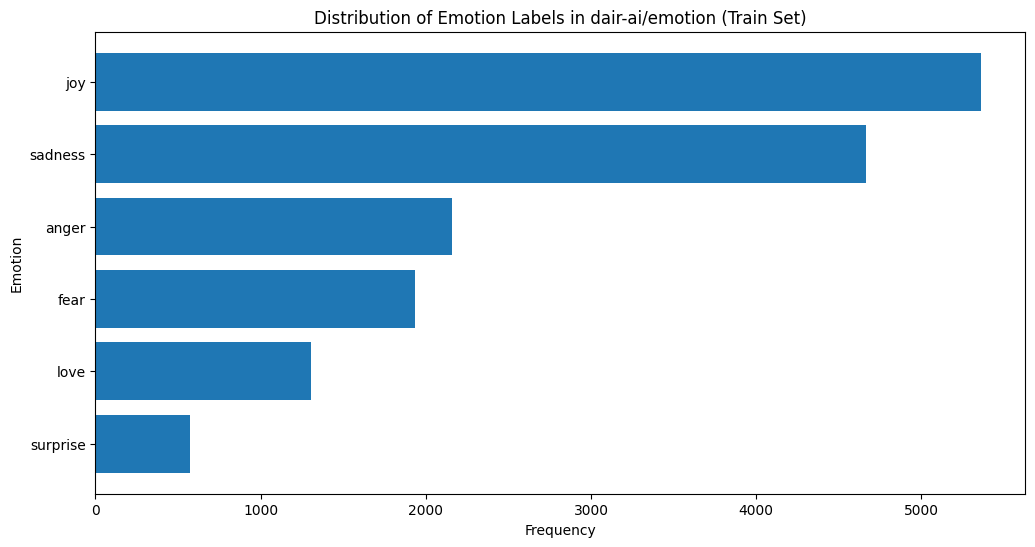

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# 1) Get the label names from the 'label' feature
label_names = dataset['train'].features['label'].names

# 2) Count occurrences of each integer label
label_counts = Counter(x['label'] for x in dataset['train'])

# 3) Sort by frequency
sorted_labels = sorted(label_counts.items(), key=lambda kv: kv[1], reverse=True)

# 4) Plot
plt.figure(figsize=(12,6))
plt.barh(
    [label_names[i] for i, _ in sorted_labels],
    [count for _, count in sorted_labels]
)
plt.xlabel('Frequency')
plt.ylabel('Emotion')
plt.title('Distribution of Emotion Labels in dair-ai/emotion (Train Set)')
plt.gca().invert_yaxis()
plt.show()

## Text length distribution

Min: 2, Max: 66, Mean: 19.1663125, Median: 17.0


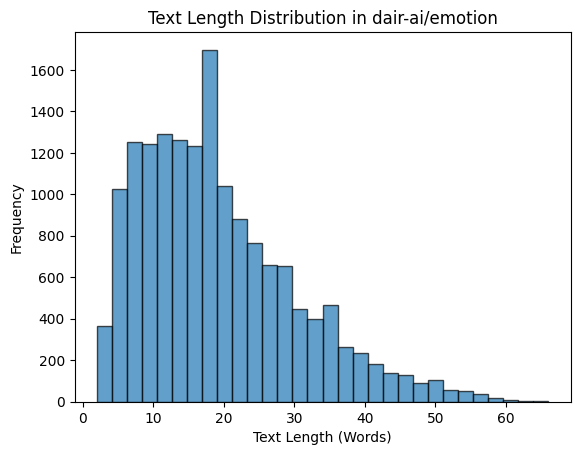

In [6]:
import numpy as np
import matplotlib.pyplot as plt

text_lengths = [len(example['text'].split()) for example in dataset['train']]

print(f"Min: {np.min(text_lengths)}, Max: {np.max(text_lengths)}, Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}")

plt.hist(text_lengths, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Text Length (Words)')
plt.ylabel('Frequency')
plt.title('Text Length Distribution in dair-ai/emotion')
plt.show()

## Word Cloud

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


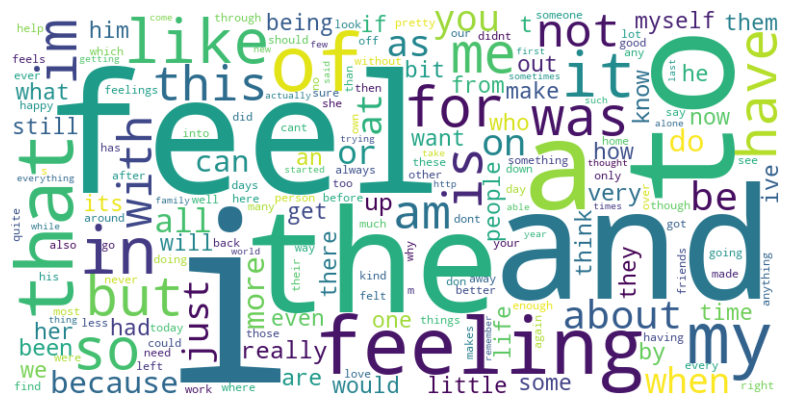

In [7]:
from wordcloud import WordCloud
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Ensure punkt tokenizer is available
nltk.download('punkt')

all_text = " ".join([example['text'] for example in dataset['train']])
tokens = nltk.word_tokenize(all_text)
filtered_words = [word.lower() for word in tokens if word.isalpha()]
word_counts = Counter(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Top and Bottom 5 Labels

In [9]:
from collections import Counter
import pandas as pd

#Get the single-label names
label_names = dataset['train'].features['label'].names

#Count up each integer label
label_counts = Counter(x['label'] for x in dataset['train'])

#Sort by frequency
sorted_labels = sorted(label_counts.items(), key=lambda kv: kv[1], reverse=True)

#Split top and bottom 5
top_5    = sorted_labels[:5]
bottom_5 = sorted_labels[-5:]

#Build DataFrames
top_df = pd.DataFrame(top_5, columns=['Label Index','Count'])
top_df['Emotion'] = top_df['Label Index'].map(lambda i: label_names[i])
top_df['Type']    = 'Top 5'

bottom_df = pd.DataFrame(bottom_5, columns=['Label Index','Count'])
bottom_df['Emotion'] = bottom_df['Label Index'].map(lambda i: label_names[i])
bottom_df['Type']    = 'Bottom 5'

#Combine & display
summary_df = pd.concat([top_df, bottom_df], ignore_index=True)
summary_df = summary_df[['Type','Emotion','Label Index','Count']]
print(summary_df)

       Type   Emotion  Label Index  Count
0     Top 5       joy            1   5362
1     Top 5   sadness            0   4666
2     Top 5     anger            3   2159
3     Top 5      fear            4   1937
4     Top 5      love            2   1304
5  Bottom 5   sadness            0   4666
6  Bottom 5     anger            3   2159
7  Bottom 5      fear            4   1937
8  Bottom 5      love            2   1304
9  Bottom 5  surprise            5    572


## Top 20 Word Frequencies with Stopwords Highlighted

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


Top 20 words:
i: 25859
feel: 11183
and: 9589
to: 8972
the: 8370
a: 6200
feeling: 5112
that: 5112
of: 4990
my: 4283
in: 3433
it: 3127
like: 2908
so: 2527
for: 2431
im: 2430
me: 2311
but: 2255
was: 2227
have: 2224

Top stopwords in the top 20 words:
i: 25859
and: 9589
to: 8972
the: 8370
a: 6200
that: 5112
of: 4990
my: 4283
in: 3433
it: 3127
so: 2527
for: 2431
me: 2311
but: 2255
was: 2227
have: 2224


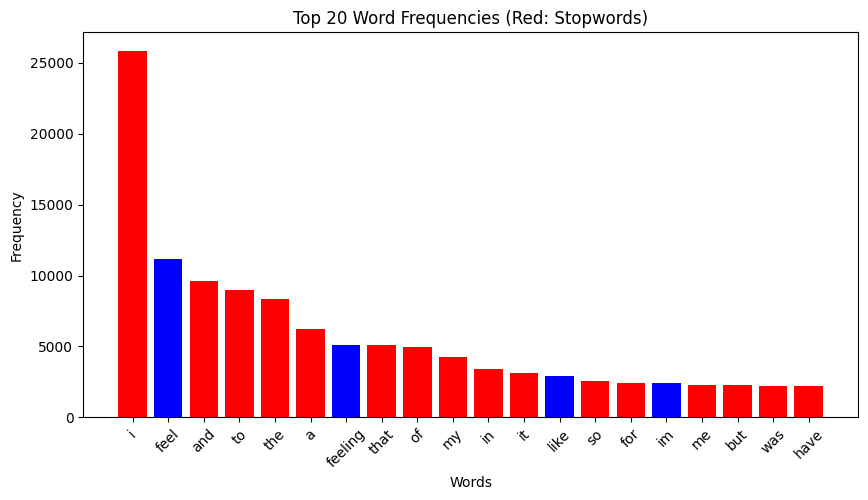

In [10]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download resources
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

all_words = []
for example in dataset['train']:
    tokens = nltk.word_tokenize(example['text'])
    words = [word.lower() for word in tokens if word.isalpha()]
    all_words.extend(words)

word_counts = Counter(all_words)
top_20 = word_counts.most_common(20)
top_stopwords = [(word, count) for word, count in top_20 if word in stop_words]

print('Top 20 words:')
for word, count in top_20:
    print(f'{word}: {count}')

print('\nTop stopwords in the top 20 words:')
for word, count in top_stopwords:
    print(f'{word}: {count}')

words, counts = zip(*top_20)
colors = ['red' if word in stop_words else 'blue' for word in words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color=colors)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequencies (Red: Stopwords)')
plt.show()